                      Track Name  Minutes Played
0   Her Ghost in the Fog - Remix      308.803717
1               Mutluluk Reklamı      196.602433
2                      Son Arzum      191.633433
3                Belki - Akustik      185.995517
4             Warpath of Disease      184.254350
5                       Unbroken      178.537033
6                        Hayyyam      156.328467
7                          Gitme      155.704050
8           Ben Hala Vazgeçmedim      153.528733
9                         Scream      151.034300
10                    Biri Vardı      148.380017
11                         Melek      137.211000
12            Unholy Confessions      131.359083
13            Heart Like a Grave      127.401683
14            Seni Kaybettiğimde      122.504483
15             Facing The Echoes      121.934583
16                Sevdiğim Kadın      121.303083
17                       Gehenna      120.090467
18                   Boş Gemiler      119.664633
19                Sa

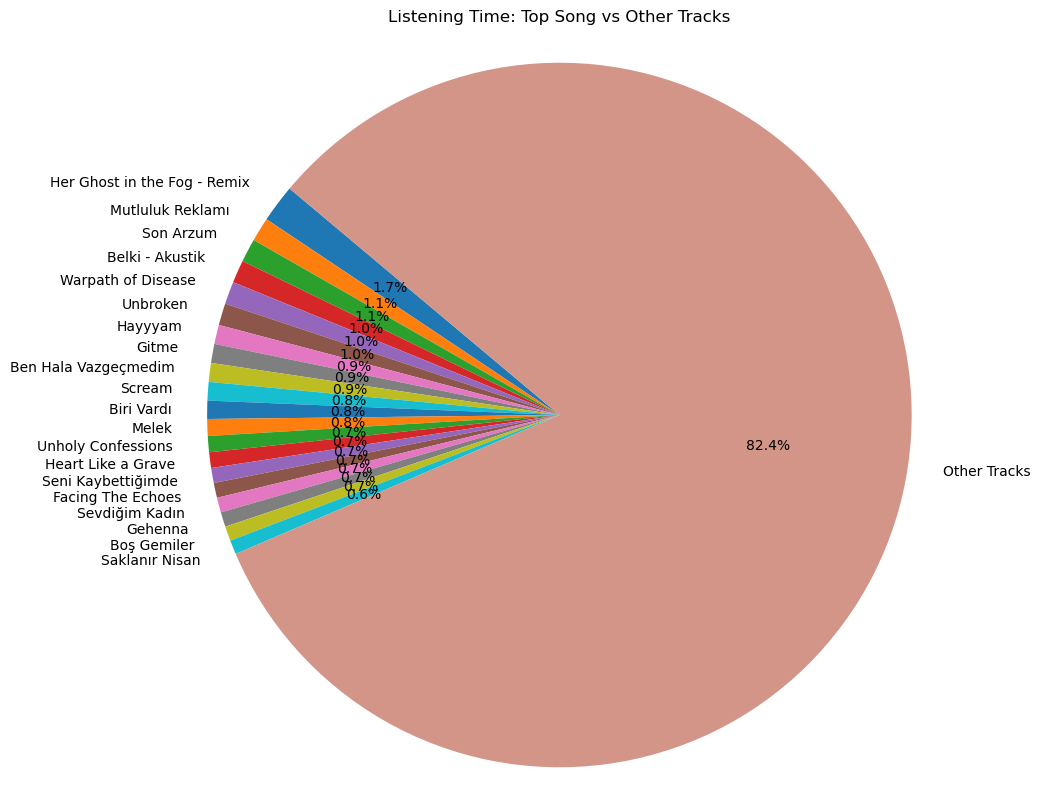

In [44]:
import json
import pandas as pd
# Load the JSON file
file_path = 'C:/Users/Mert/OneDrive/Masaüstü/Spotify Account Data/StreamingHistory0.json'

with open(file_path, 'r', encoding='utf-8') as file:
    streaming_data = json.load(file)

# Calculate the total msPlayed for each trackName and convert to seconds
track_play_time = {}

for record in streaming_data:
    track = record['trackName']
    ms_played = record['msPlayed']
    minutes_played = ms_played / 60000  # Convert milliseconds to seconds
    if track in track_play_time:
        track_play_time[track] += minutes_played
    else:
        track_play_time[track] = minutes_played

# Sort the tracks by play time in seconds and select the top 5
top_5_tracks = sorted(track_play_time.items(), key=lambda x: x[1], reverse=True)[:20]
# Create a DataFrame from the sorted list
df = pd.DataFrame(top_5_tracks, columns=['Track Name', 'Minutes Played'])

# Display the DataFrame
print(df)

import matplotlib.pyplot as plt

# Extract the minutes played for the top 20 tracks
top_20_minutes = list(df['Minutes Played'])

# Calculate total minutes played for all other tracks
other_tracks_minutes = all_tracks_total_minutes - sum(top_20_minutes)

# Labels for the top 20 tracks plus one label for 'Other Tracks'
labels = list(df['Track Name']) + ['Other Tracks']

# Sizes for the top 20 tracks plus the size for 'Other Tracks'
sizes = top_20_minutes + [other_tracks_minutes]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#D39588']  # Repeat or add more colors if needed

# Plot
plt.figure(figsize=(10, 10))  # Adjust size to fit all labels if necessary
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Listening Time: Top Song vs Other Tracks")
plt.show()

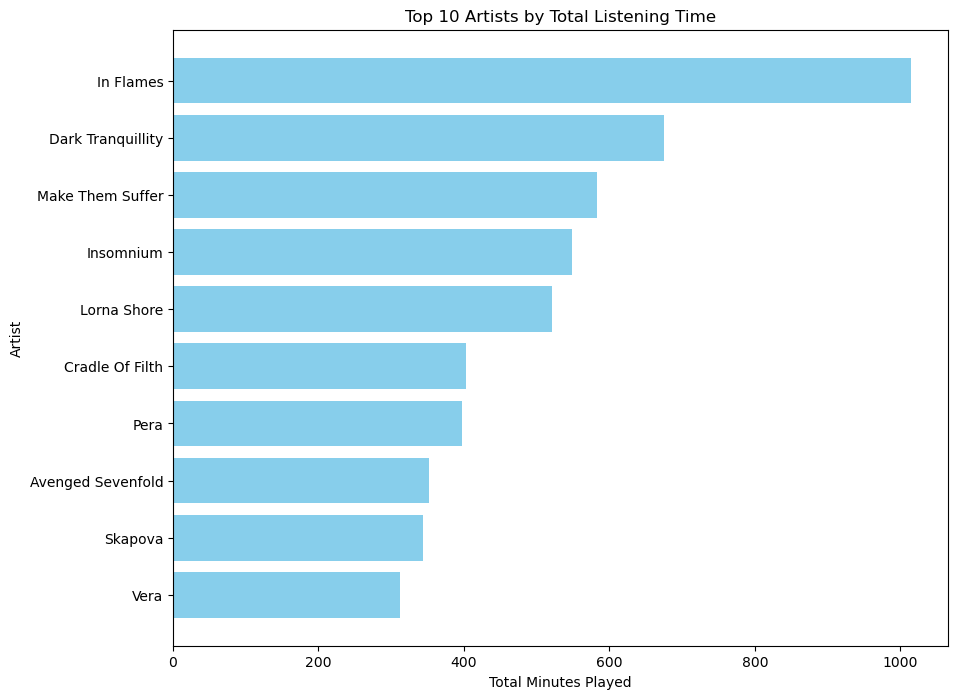

In [41]:
artist_play_time = {}

for record in streaming_data:
    artist = record['artistName']
    ms_played = record['msPlayed']
    m_played = ms_played / 60000
    if artist in artist_play_time:
        artist_play_time[artist] += m_played
    else:
        artist_play_time[artist] = m_played

# Sort the artists by msPlayed and select the top 5
top_10_artists = sorted(artist_play_time.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_artists

import matplotlib.pyplot as plt

# Convert the top 10 artist data into separate lists for plotting
artists, play_times = zip(*top_10_artists)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(artists, play_times, color='skyblue')
plt.xlabel('Total Minutes Played')
plt.ylabel('Artist')
plt.title('Top 10 Artists by Total Listening Time')
plt.gca().invert_yaxis()  # Invert y-axis to have the artist with most play time on top
plt.show()

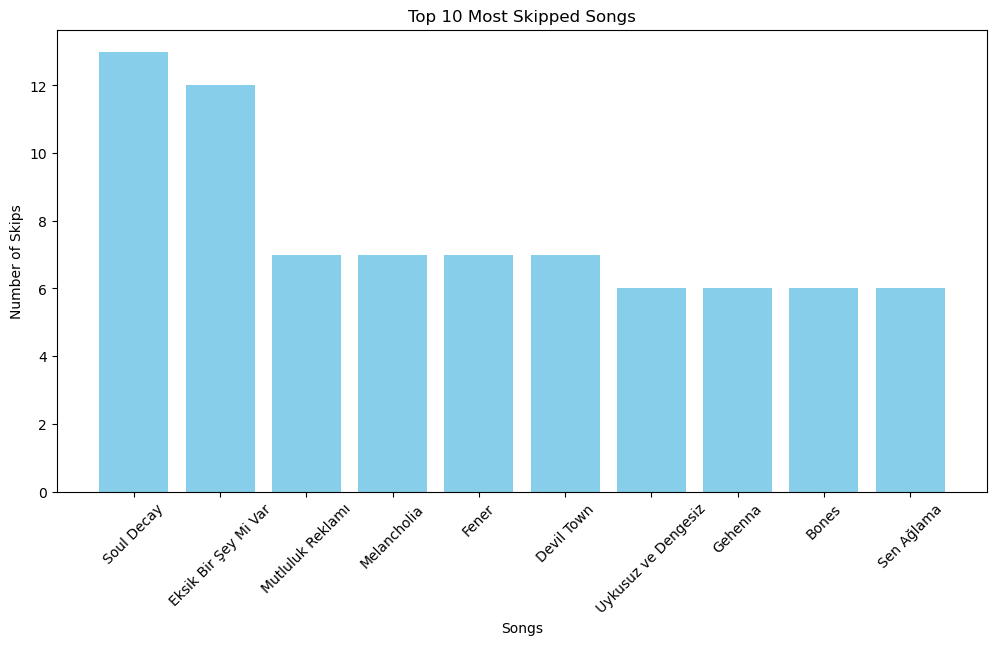

In [42]:
skipped_songs = {}

# Iterate through each record in the streaming data
for record in streaming_data:
    track_name = record['trackName']
    ms_played = record['msPlayed']

    # If the song was played for less than 30000 ms (30 seconds), count it as skipped
    if ms_played < 30000:
        if track_name in skipped_songs:
            skipped_songs[track_name] += 1
        else:
            skipped_songs[track_name] = 1

# Sort the songs by the number of times they were skipped and select the top 5
top_10_skipped_songs = sorted(skipped_songs.items(), key=lambda x: x[1], reverse=True)[:10]

top_10_skipped_songs

import matplotlib.pyplot as plt

# Extract song names and their skip counts
song_names = [song[0] for song in top_10_skipped_songs]
skip_counts = [song[1] for song in top_10_skipped_songs]

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(song_names, skip_counts, color='skyblue')

# Add labels and title
plt.xlabel('Songs')
plt.ylabel('Number of Skips')
plt.title('Top 10 Most Skipped Songs')
plt.xticks(rotation=45)  # Rotate the song names for better readability

# Show the plot
plt.show()

In [45]:
track_play_time = {}
track_skips = {}

# Process each record in the streaming data
for record in streaming_data:
    track_name = record['trackName']
    ms_played = record['msPlayed']

    # Update total play time for each track
    if track_name not in track_play_time:
        track_play_time[track_name] = 0
    track_play_time[track_name] += ms_played

    # Record if the track was skipped
    if ms_played < 30000:
        track_skips[track_name] = True

# Filter out tracks that were skipped even once
unskipped_tracks = {track: time for track, time in track_play_time.items() if track not in track_skips}

# Sort the unskipped tracks by total play time and get the top 5
top_5_unskipped_tracks = sorted(unskipped_tracks.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_unskipped_tracks

top_5_unskipped_tracks_in_minutes = [(track, round(ms_played / 60000, 2)) for track, ms_played in top_5_unskipped_tracks]
# Create a DataFrame from the list
df = pd.DataFrame(top_5_unskipped_tracks_in_minutes, columns=['Track Name', 'Minutes Played'])

# Display the DataFrame
print(df)


                     Track Name  Minutes Played
0                     Son Arzum          191.63
1                  Remenissions           74.61
2  Flesh and the Power It Holds           73.37
3   Tek Yön Seçtiğin Tüm Yollar           69.05
4            Cold as Perfection           63.07


In [10]:
night_time_songs = 0
total_songs = 0

# Define the start and end hours for the night time frame
night_start = 21
night_end = 7

for record in streaming_data:
    # Extract the hour from the endTime
    end_time = record['endTime']
    hour = int(end_time[-5:-3])  # Get the hour part from the endTime string

    # Count the song if it's within the night time frame
    if (night_start <= hour) or (hour < night_end):
        night_time_songs += 1

    # Count all songs
    total_songs += 1

# Calculate the ratio
if total_songs > 0:
    ratio = night_time_songs / total_songs
else:
    ratio = 0

ratio

0.10889163867774439

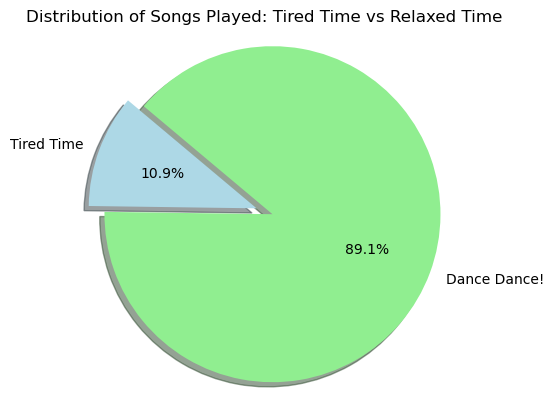

In [23]:
import matplotlib.pyplot as plt

# Data for plotting
labels = 'Tired Time', 'Dance Dance!'
sizes = [night_time_songs, total_songs - night_time_songs]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice (Night Time Songs)

# Plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Songs Played: Tired Time vs Relaxed Time')
plt.show()